In [10]:
# Lab 10 MNIST and NN
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 128
D = 784   # number of features.
K = 10    # number of classes.

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, D])
Y = tf.placeholder(tf.float32, [None, K])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([D, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.leaky_relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.leaky_relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, K]))
b3 = tf.Variable(tf.random_normal([K]))
hypothesis = tf.matmul(L2, W3) + b3

In [5]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [6]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 151.662533927
Epoch: 0002 cost = 43.049298884
Epoch: 0003 cost = 27.688277443
Epoch: 0004 cost = 19.791068704
Epoch: 0005 cost = 14.985244883
Epoch: 0006 cost = 11.722521400
Epoch: 0007 cost = 9.200610231
Epoch: 0008 cost = 7.515008707
Epoch: 0009 cost = 5.853337359
Epoch: 0010 cost = 4.768237904
Learning Finished!


Accuracy: 0.9401
Label:  [2]
Prediction:  [2]


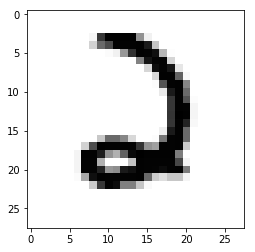

In [7]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [8]:
not_mnist = input_data.read_data_sets("./notMNIST_data/", one_hot=True)

Extracting ./notMNIST_data/train-images-idx3-ubyte.gz
Extracting ./notMNIST_data/train-labels-idx1-ubyte.gz
Extracting ./notMNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./notMNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
# Load the test images from the data and their lables. 
Xnm_test = not_mnist.test.images
# Once again convert one-hot-vector to the corresponding labels.
Ynm_test = np.argmax(not_mnist.test.labels,axis=1)

truth =  3


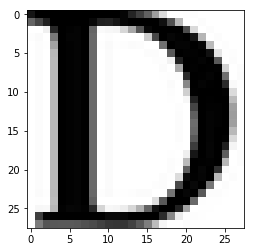

In [13]:
# Load the first image from the notMNIST.
test_image = Xnm_test[0]
test_label = Ynm_test[0]
print('truth = ',test_label)
pixels = test_image.reshape((28, 28))
plt.imshow(pixels, cmap='binary')

In [16]:
pred = sess.run(hypothesis, feed_dict={X: Xnm_test[0:1]})

In [24]:
print(sess.run(tf.argmax(pred,1)))

[6]


In [28]:
# Load the test images from the data and their lables. 
Xm_test = mnist.test.images
# Once again convert one-hot-vector to the corresponding labels.
Ym_test = np.argmax(mnist.test.labels,axis=1)

truth =  7


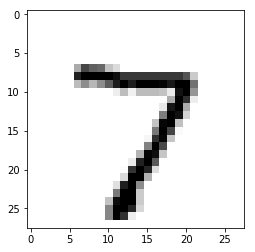

In [31]:
# Load the first image from the notMNIST.
test_image = Xm_test[0]
test_label = Ym_test[0]
print('truth = ',test_label)
pixels = test_image.reshape((28, 28))
plt.imshow(pixels,cmap='binary')

In [33]:
pred = sess.run(hypothesis, feed_dict={X: Xm_test[0:1]})

In [34]:
print(sess.run(tf.argmax(pred,1)))

[7]
